# BLG634E - Homework 0 Basic Image Processing

### Bengisu Guresti - 504191557

## Part 1: Numpy

$ A = \begin{pmatrix} -1 & 1 & -3 \\
                      2 & -2 & 2 \\
                      0 & 3 & -3 \end{pmatrix}$, $ B = \begin{pmatrix} 0 & 0 & 0 \\
                      1 & 0 & 0 \\
                      0 & 0 & 0 \end{pmatrix}$, $ C = \begin{pmatrix} 3 & 1 \\
                      4 & 1 \\
                      5 & 1 \end{pmatrix}$, $ D = \begin{pmatrix} 5 \\ 4 \\ 3\end{pmatrix}$

In [1]:
import numpy as np

In [2]:
A = np.array([[-1, 1, -3], [2, -2, 2], [0, 3, -3]])
B = np.array([[0, 0, 0], [1, 0, 0], [0, 0, 0]])
C = np.array([[3, 1], [4, 1], [5, 1]])
D = np.array([[5], [4], [3]])

In [3]:
print("A = \n{}\n".format(A))
print("B = \n{}\n".format(B))
print("C = \n{}\n".format(C))
print("D = \n{}".format(D))

A = 
[[-1  1 -3]
 [ 2 -2  2]
 [ 0  3 -3]]

B = 
[[0 0 0]
 [1 0 0]
 [0 0 0]]

C = 
[[3 1]
 [4 1]
 [5 1]]

D = 
[[5]
 [4]
 [3]]


### $\bullet$ Find matrix multiplications: $A \times B$,  $A \times A^T$ 

In [4]:
mm1 = np.matmul(A, B)
mm2 = np.matmul(A, A.T)

In [5]:
print("A x B = \n{}\n".format(mm1))
print("A x A^T = \n{}".format(mm2))

A x B = 
[[ 1  0  0]
 [-2  0  0]
 [ 3  0  0]]

A x A^T = 
[[ 11 -10  12]
 [-10  12 -12]
 [ 12 -12  18]]


### $\bullet$ Find elementwise multiplications: $A * B$,  $A * A^T$ 

In [6]:
em1 = A * B
em2 = A * A.T

In [7]:
print("A * B = \n{}\n".format(em1))
print("A * A^T = \n{}".format(em2))

A * B = 
[[0 0 0]
 [2 0 0]
 [0 0 0]]

A * A^T = 
[[1 2 0]
 [2 4 6]
 [0 6 9]]


### $\bullet$ Without using loops, multiply each column of C with D. (Hint: You can use broadcasting.)

In [8]:
ans = C * D

In [9]:
print("Each column of C multiplied with D: \n{}".format(ans))

Each column of C multiplied with D: 
[[15  5]
 [16  4]
 [15  3]]


### $\bullet$ Determine whether linear systems [A|D], [B|D], [C|D] are solvable. If so, find their solutions.

There exists a solution for a linear equation system if and only if the rank of its coefficient matrix is equal to the rank of its augmented matrix. In case a solution exists, the solution is unique when rank of the coefficient matrix is equal to number of columns of the matrix of the system. In case a solution exists and the rank of the coefficient matrix is less than the number of columns of the matrix of the system, there are infinite number of solutions. When there is a unique solution, it can be calculated by matrix multiplication of inverse (or pseudoinverse) of coefficient matrix and vector used in augmentation. (i.e. for $A \times x = b$, $x = A^{-1} \times b$)

In [10]:
def check_and_solve(coef, aug):
    ''' Check whether the system with the given 
    coefficient and augmented matrix is solvable
    and return True if solvable False if not solvable,
    if the system is not solvable return None as
    solution, else if the system is solvable and there
    are infinite number of solutions return string 
    <infinite_number_of_solutions>, else the system is
    solvable and the solution is unique return the solution'''
    rank_coef = np.linalg.matrix_rank(coef)
    rank_aug = np.linalg.matrix_rank(aug)
    # Check if rank of coefficient matrix is equal to 
    # rank of augmented matrix
    sol_exists = rank_coef == rank_aug
    if sol_exists:
        col_count = coef.shape[-1]
        # Check if rank of the coefficient matrix is
        # less than columns of the coefficient matrix
        if rank_coef < col_count:
            # if rank of the coefficient matrix is less
            # than the columns of the coefficient matrix
            # there are infinite number of solutions
            sol = 'infinite_number_of_solutions'
        else:
            # There is a unique solution calculated
            inv = np.linalg.inv(coef) if coef.shape[0] \
                                        == coef.shape[-1] else \
                                        np.linalg.pinv(coef)
            sol= np.matmul(inv, aug[:, -1])
    else:
        # If rank of coefficient matrix is not equal to 
        # rank of augmented matrix then
        # no solution exists
        sol = None
    return sol_exists, sol

#### $\square [A | D]$  solvable? 

In [11]:
aug_1 = np.concatenate((A, D), axis=-1)
solvable_1, solution_1 = check_and_solve(A, aug_1)

In [12]:
if solvable_1:
    print("The linear system [A|D] is solvable.\n")
    print("Solution is: \n{}".format(solution_1))
else:
    print("The linear system [A|D] is NOT solvable.\n")

The linear system [A|D] is solvable.

Solution is: 
[ 3.  -2.5 -3.5]


#### $\square [B | D]$  solvable? 

In [13]:
aug_2 = np.concatenate((B, D), axis=-1)
solvable_2, solution_2 = check_and_solve(B, aug_2)

In [14]:
if solvable_2:
    print("The linear system [B|D] is solvable.\n")
    print("Solution is: \n{}".format(solution_2))
else:
    print("The linear system [B|D] is NOT solvable.\n")

The linear system [B|D] is NOT solvable.



#### $\square [C | D]$  solvable? 

In [15]:
aug_3 = np.concatenate((C, D), axis=-1)
solvable_3, solution_3 = check_and_solve(C, aug_3)

In [16]:
if solvable_3:
    print("The linear system [C|D] is solvable.\n")
    print("Solution is: \n{}".format(solution_3))
else:
    print("The linear system [C|D] is NOT solvable.\n")

The linear system [C|D] is solvable.

Solution is: 
[-1.  8.]


## Part 2: Image Manipulation - I

In [17]:
import cv2
import numpy as np
import re
import moviepy.editor as mpy

from matplotlib import pyplot as plt
from glob import glob
from PIL import Image
from copy import deepcopy
from IPython.display import display
from IPython.display import Video

### $\bullet$ Read background image

In [18]:
orig_background = cv2.imread('Malibu.jpg')
orig_background.shape

(776, 1998, 3)

### $\bullet$ Read cat images from directory and sort them into their true sequence

In [19]:
file_seq = [im for im in glob('cat/*.png')]
sorted_file_seq = sorted(file_seq, key=lambda x:int(re.findall("(\d+)",x)[0]))
cat_seq = np.array([cv2.imread(f) for f in sorted_file_seq])
cat_seq.shape

(180, 360, 640, 3)

### $\bullet$ Reshape background image to have a height matched with the height of cat images

In [20]:
orig_bg_h, orig_bg_w, ch = orig_background.shape
ratio = cat_seq.shape[-3] / orig_bg_h
background = cv2.resize(orig_background, (int(orig_bg_w * ratio), cat_seq.shape[-3]))
background.shape

(360, 926, 3)

### $\bullet$ Display resized background

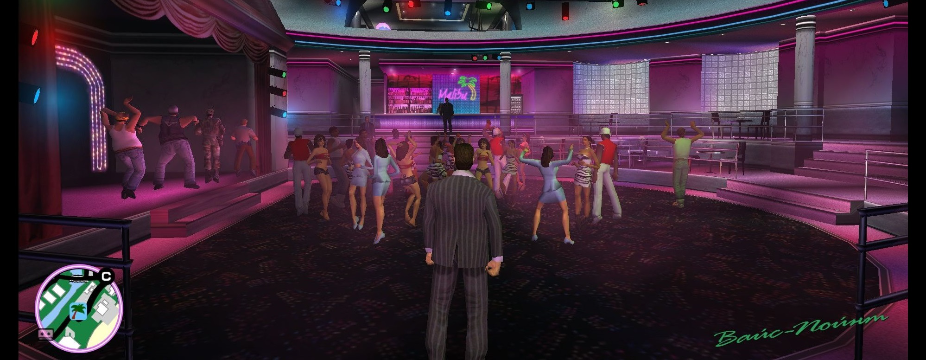

In [21]:
display(Image.fromarray(cv2.cvtColor(background, cv2.COLOR_BGR2RGB)))

### $\bullet$ Function to write video

In [22]:
def video_write(img_list, video_path, sound_path):
    clip = mpy.ImageSequenceClip(img_list, fps = 25)
    audio = mpy.AudioFileClip(sound_path).set_duration(clip.duration)
    clip = clip.set_audio(audioclip=audio)
    clip.write_videofile(video_path, codec='libx264', audio_codec="aac")

### $\bullet$ Manipulation

Check pixels that belong to the cat and write them on the background for each frame in image sequence. Save the resulting sequence as both bgr and rgb.

In [23]:
cat_in_malibu = np.repeat(background[np.newaxis, :, :, :], len(cat_seq), axis=0)
cat_in_malibu_rgb = deepcopy(cat_in_malibu)
for idx in range(len(cat_in_malibu)):
    # Get frame
    cat_frame = cat_seq[idx]
    # Check cat pixels
    cat_loc = np.logical_or(cat_frame[:, :, 1] < 180, cat_frame[:, :, 0] > 150)
    # Handle mask shapes and locations
    malibu_cat_loc = np.full(cat_in_malibu[idx].shape, False, dtype=bool)
    buffer_cat_loc = np.repeat(cat_loc[:, :, np.newaxis], 3, axis=-1)
    malibu_cat_loc[:, :cat_frame.shape[1], :] = buffer_cat_loc
    # Place cat pixels
    cat_in_malibu[idx][malibu_cat_loc] = cat_frame[buffer_cat_loc]
    # Save as rgb
    cat_in_malibu_rgb[idx] = cv2.cvtColor(deepcopy(cat_in_malibu[idx]), cv2.COLOR_BGR2RGB)

### $\bullet$ Write result to video

In [24]:
video_write(list(cat_in_malibu_rgb), 'part1_video.mp4', 'selfcontrol_part.wav')

t:   0%|          | 0/181 [00:00<?, ?it/s, now=None]    

Moviepy - Building video part1_video.mp4.
MoviePy - Writing audio in part1_videoTEMP_MPY_wvf_snd.mp4
MoviePy - Done.
Moviepy - Writing video part1_video.mp4



Moviepy - Done !
Moviepy - video ready part1_video.mp4


### $\bullet$ Display video

In [25]:
Video('part1_video.mp4', embed=True)

## Part 3: Image Manipulation - II

### $\bullet$ Manipulation

Check pixels that belong to the cat in the original frames and horizontally flipped frames and write them on the background for each frame in image sequence. Original cat pixels are placed from the leftmost to right, flipped cat pixels are placed from the rightmost to left. Save the resulting sequence as both bgr and rgb.

In [26]:
mirrored_cat_in_malibu = np.repeat(background[np.newaxis, :, :, :], len(cat_seq), axis=0)
mirrored_cat_in_malibu_rgb = deepcopy(mirrored_cat_in_malibu)
for idx in range(len(cat_in_malibu)):
    # Get frame
    cat_frame = cat_seq[idx]
    # Get flipped frame
    flipped_cat_frame = np.flip(cat_seq[idx], axis=1)
    # Check cat pixels
    cat_loc = np.logical_or(cat_frame[:, :, 1] < 180, cat_frame[:, :, 0] > 150)
    # Check flipped cat pixels
    flipped_cat_loc = np.logical_or(flipped_cat_frame[:, :, 1] < 180, \
                                    flipped_cat_frame[:, :, 0] > 150)
    # Handle mask shapes and locations for original and flipped frames
    malibu_cat_loc_left = np.full(cat_in_malibu[idx].shape, False, dtype=bool)
    malibu_cat_loc_right = np.full(cat_in_malibu[idx].shape, False, dtype=bool)
    buffer_cat_loc = np.repeat(cat_loc[:, :, np.newaxis], 3, axis=-1)
    flipped_buffer_cat_loc = np.repeat(flipped_cat_loc[:, :, np.newaxis], 3, axis=-1)
    malibu_cat_loc_left[:, :cat_frame.shape[1], :] = buffer_cat_loc
    malibu_cat_loc_right[:, -cat_frame.shape[1]:, :] = flipped_buffer_cat_loc
    # Place original cat pixels
    mirrored_cat_in_malibu[idx][malibu_cat_loc_left] = cat_frame[buffer_cat_loc]
    # Place mirrored (flipped) cat pixels
    mirrored_cat_in_malibu[idx][malibu_cat_loc_right] = flipped_cat_frame[flipped_buffer_cat_loc]
    # Save as rgb
    mirrored_cat_in_malibu_rgb[idx] = cv2.cvtColor(deepcopy(mirrored_cat_in_malibu[idx]), cv2.COLOR_BGR2RGB)

### $\bullet$ Write result to video

In [27]:
video_write(list(mirrored_cat_in_malibu_rgb), 'part2_video.mp4', 'selfcontrol_part.wav')

t:   0%|          | 0/181 [00:00<?, ?it/s, now=None]    

Moviepy - Building video part2_video.mp4.
MoviePy - Writing audio in part2_videoTEMP_MPY_wvf_snd.mp4
MoviePy - Done.
Moviepy - Writing video part2_video.mp4



Moviepy - Done !
Moviepy - video ready part2_video.mp4


### $\bullet$ Display video

In [28]:
Video('part2_video.mp4', embed=True)

## Part 4: Edge and Shape Detection

### $\bullet$ Read dice images from directory and sort them into their true sequence

In [29]:
dice_file_seq = [im for im in glob('dice/*.png')]
sorted_dice_file_seq = sorted(dice_file_seq, key=lambda x:int(re.findall("(\d+)",x)[0]))
dices = np.array([cv2.imread(f) for f in sorted_dice_file_seq])
dices.shape

(4,)

### $\bullet$ Note true dice values

In [30]:
true_dice_vals = [3, 6, 4, 6]

### $\bullet$ Dice value prediction algorithm

For a given image, convert the image to grey-scale in order to use Hough circle detection algorithm. After the image is converted to grey-scale, use Hough circle detection to detect circles. If no circles can be detected, either the input image is not a proper dice or current tuning can not predict its value. If any circle can be detected, count how many circles are detected. The number of circles detected is the value of the dice. Report prediction result and display marked dice image.

In [31]:
def predict_dice(dice_img):
    dice_cpy = deepcopy(dice_img)
    # Convert dice image to grey-scale for hough circle detection
    dice = cv2.cvtColor(dice_img, cv2.COLOR_BGR2GRAY)
    # Detect circles with hough circle detection
    circles = cv2.HoughCircles(dice, cv2.HOUGH_GRADIENT, 2.5, 20, minRadius=1, maxRadius=25)
    # If no circles can be detected
    if circles is None:
        print("Given image is not dice or it can not be predicted with the current tuning.")
        return 0
    # If circles are detected, mark them
    dice_pred = len(circles[0])
    for circ in circles[0, :]: 
        h, w, r = circ[0], circ[1], circ[2] 
        # Draw the obtained circle
        cv2.circle(dice_cpy, (h, w), r, (0, 0, 255), 3)
    # Report prediction and display marked dice
    print("Prediction:")
    print("Dice is {}".format(dice_pred))
    display(Image.fromarray(cv2.cvtColor(dice_cpy, cv2.COLOR_BGR2RGB)))
    return dice_pred

For each dice image, the prediction algorithm is run. The function for the algorithm already reports prediction result and displays marked dice image. Prediction results with true dice values are compared and whether the prediction is correct or not is reported. Finally, the prediction accuracy is reported.

Prediction:
Dice is 3


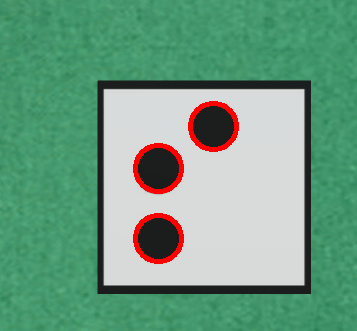

Prediction is correct!
Prediction:
Dice is 6


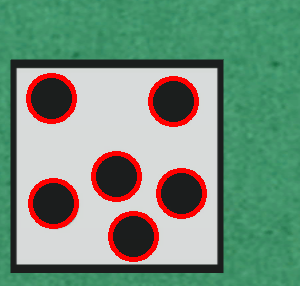

Prediction is correct!
Prediction:
Dice is 4


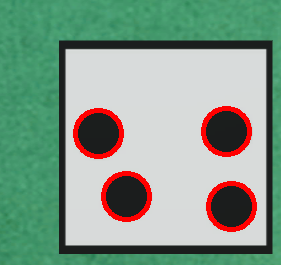

Prediction is correct!
Prediction:
Dice is 6


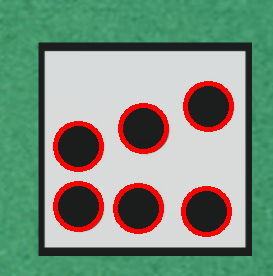

Prediction is correct!
Prediction accuracy: 100.0%


In [32]:
correct_pred = 0
for i, dice in enumerate(dices):
    dice_val = predict_dice(dice)
    if dice_val == true_dice_vals[i]:
        print("Prediction is correct!")
        correct_pred += 1
    else:
        print("Prediction is incorrect!")
print("Prediction accuracy: {}%".format(correct_pred * 100 / len(dices)))